# Example of Graph Neural Network

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.metrics import auc
import numpy as np
import pandas as pd
# import seaborn as sns
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger

sys.path.append('../..')
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def calc_eta(r, z):
    theta = np.arctan2(r, z)
    return -1. * np.log(np.tan(theta / 2.))

## Load an Event

In [3]:
input_dir = "/global/cfs/cdirs/m3443/data/ITk-upgrade/processed/filter_processed/0.5GeV_barrel"
train_files = [os.path.join(input_dir, "train", event) for event in os.listdir(os.path.join(input_dir, "train"))]

In [4]:
example_number = 0
example_event = torch.load(train_files[example_number]).cpu()

## Trim Event to Simplified Graph

In [5]:
example_event

Data(cell_data=[22129, 11], edge_index=[2, 186974], event_file="/project/projectdirs/m3443/data/ITk-upgrade/processed/full_events_v4/event000015937", hid=[22129], modulewise_true_edges=[2, 18388], nhits=[22129], pid=[22129], primary=[22129], pt=[22129], signal_true_edges=[2, 14729], x=[22129, 3], y=[186974], y_pid=[186974])

In [6]:
edges = example_event.edge_index
r, phi, z = example_event.x.T
eta = calc_eta(r, z)

In [7]:
pt_cut = (example_event.pt[edges] > 1000.).all(0)
eta_cut = ( (eta[edges] > -1.) & (eta[edges] < 1.) ).all(0)

In [8]:
graph = edges[:, pt_cut & eta_cut]
truth = example_event.y[pt_cut & eta_cut]

## Visualise

In [9]:
x, y = r*np.cos(np.pi*phi), r*np.sin(np.pi*phi)

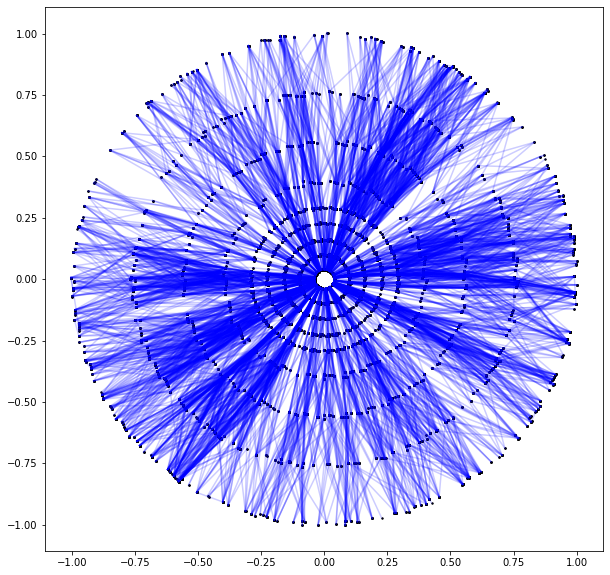

In [62]:
plt.figure(figsize=(10,10))
plt.plot(x[graph], y[graph], c="b", alpha=0.2);
plt.scatter(x[graph], y[graph], c="k", s=2)

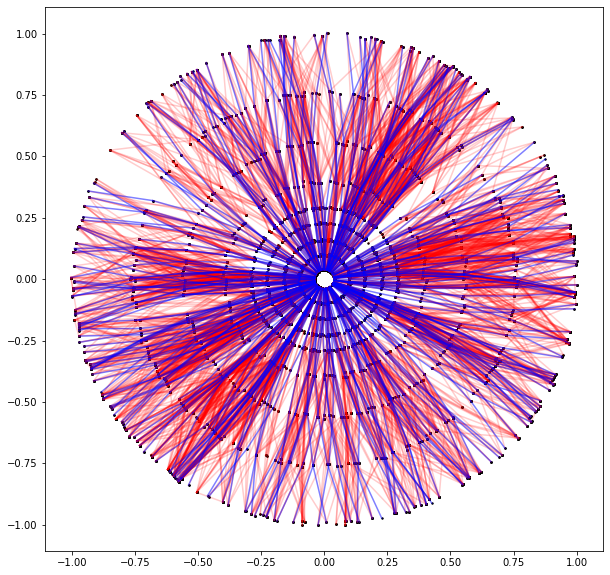

In [66]:
plt.figure(figsize=(10,10))
plt.plot(x[graph[:,~truth]], y[graph[:,~truth]], c="r", alpha=0.2);
plt.plot(x[graph[:,truth]], y[graph[:,truth]], c="b", alpha=0.5);
plt.scatter(x[graph], y[graph], c="k", s=2)

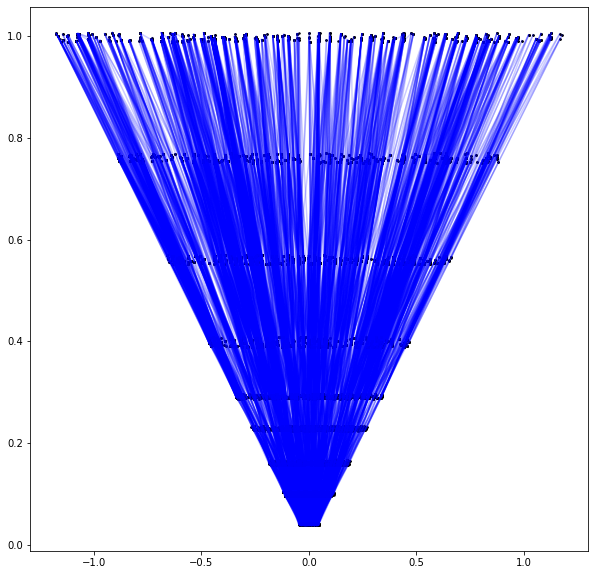

In [57]:
plt.figure(figsize=(10,10))
plt.plot(z[graph], r[graph], c="b", alpha=0.2);
plt.scatter(z[graph], r[graph], c="k", s=2)

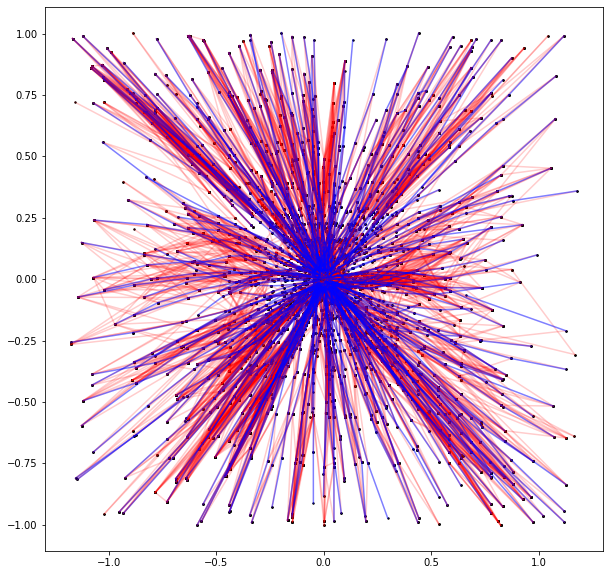

In [10]:
plt.figure(figsize=(10,10))
plt.plot(z[graph[:,~truth]], y[graph[:,~truth]], c="r", alpha=0.2);
plt.plot(z[graph[:,truth]], y[graph[:,truth]], c="b", alpha=0.5);
plt.scatter(z[graph], y[graph], c="k", s=2)